In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool, CatBoostClassifier

df = pd.read_csv('https://stepik.org/media/attachments/lesson/779915/fs_task1_10f.csv')

In [16]:
X = df.drop(['target'], axis=1) 
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(random_state=42,
                           thread_count=-1)

model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=100, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.10885
0:	learn: 1.9397215	test: 1.9473294	best: 1.9473294 (0)	total: 4.3ms	remaining: 4.29s
100:	learn: 0.4678663	test: 0.6483020	best: 0.6483020 (100)	total: 500ms	remaining: 4.45s
200:	learn: 0.3304501	test: 0.6373796	best: 0.6366906 (199)	total: 933ms	remaining: 3.71s
300:	learn: 0.2467960	test: 0.6428317	best: 0.6361299 (254)	total: 1.37s	remaining: 3.18s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6361299133
bestIteration = 254

Shrink model to first 255 iterations.


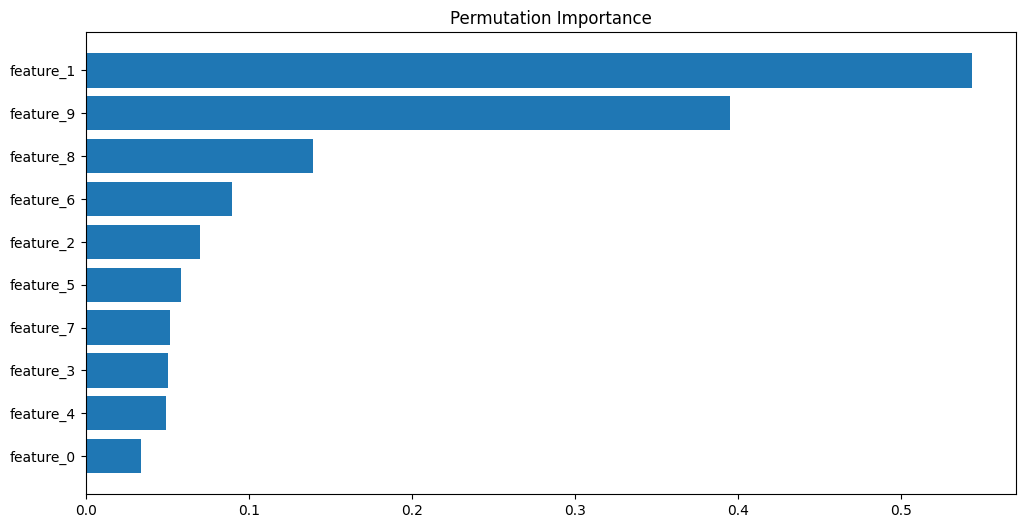

In [17]:
perm_importance = permutation_importance(model, X, y, n_repeats=10, random_state=42)
sorted_idx = perm_importance.importances_mean.argsort()
fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X.columns)[sorted_idx])
plt.title('Permutation Importance');

In [ ]:
answer_list = [1, 9, 8, 6, 2]

In [3]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,target
0,2015,163.000000,-1.450726,0.5,332,-0.018070,170,-9,0.10,50.339080,engine_ignition
1,2014,108.451384,2.233679,0.4,425,-0.849765,173,16,0.10,44.367816,break_bug
2,2010,167.738026,-8.024895,-0.8,50,0.134024,171,-9,0.10,44.902299,engine_check
3,2018,167.000000,-0.201363,2.0,224,-0.985060,173,-2,0.52,44.770115,engine_check
4,2019,183.000000,14.666233,0.8,351,0.606498,170,13,0.10,45.241379,another_bug
...,...,...,...,...,...,...,...,...,...,...,...
1865,2014,114.849701,-8.475321,-0.3,339,-1.062402,170,9,0.10,44.419540,gear_stick
1866,2011,152.198802,10.065974,0.2,241,-0.365611,174,-1,0.10,43.488506,engine_check
1867,2014,118.000000,9.569632,0.5,450,0.290211,171,-3,0.10,44.477011,wheel_shake
1868,2012,188.521004,14.327537,-0.7,392,1.218379,174,1,0.00,48.706897,electro_bug


In [4]:
!pip install catboost shap -q

In [21]:
!pip install boostaroota -q

In [35]:
!pip install phik -q

In [52]:
!pip install boruta -q

In [6]:
!pip install BorutaShap

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 3.8 MB/s eta 0:00:00m eta 0:00:01:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.8/233.8 kB 7.1 MB/s eta 0:00:00


In [24]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779915/fs_task2_22f.csv')

In [34]:
from boostaroota import BoostARoota
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

X = df.drop(['target_class', 'target_reg'], axis=1)
y = df[['target_reg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

br = BoostARoota(metric='logloss', silent=True)

br.fit(X_train, y_train_enc)

TypeError: can only concatenate str (not "float") to str

In [ ]:
pd.DataFrame(br.keep_vars_)

interval columns not set, guessing: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'target_reg']


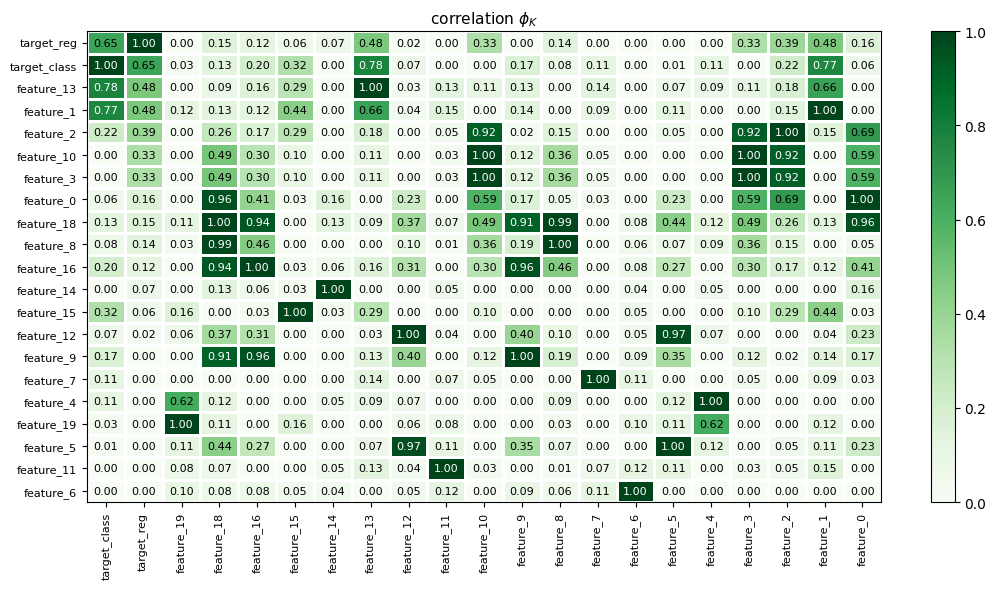

In [36]:
import phik
from phik.report import plot_correlation_matrix
from phik import report

phik_overview = df.phik_matrix().round(2).sort_values(['target_reg', 'target_class'])

plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=0.8, figsize=(11, 6))
plt.tight_layout()

In [37]:
df[['feature_11', 'feature_6']]

,feature_11,feature_6
0,24,157.168032
1,2,121.805143
2,27,175.889164
3,49,151.653445
4,4,159.547387
...,...,...
1865,0,176.567014
1866,33,128.338875
1867,44,124.795590
1868,43,131.572570


In [38]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,target_reg,target_class
0,0,4.101552,173,1,3.405865,88182,157.168032,1.973071e+07,0,1,...,2015,191.996603,2020,0.10,0,174,9,4.76,57.15,engine_ignition
1,0,4.303506,173,1,-2.218952,86897,121.805143,1.594185e+07,0,0,...,2015,193.547718,2015,0.10,1,174,7,4.26,60.82,engine_ignition
2,0,4.246379,174,1,-3.740321,44604,175.889164,2.127630e+07,0,0,...,2013,177.922027,2019,0.10,1,174,6,5.98,46.51,engine_ignition
3,0,4.342874,172,1,3.139031,114610,151.653445,2.250440e+07,0,0,...,2017,110.165268,2016,0.70,1,174,20,4.42,30.71,gear_stick
4,1,4.140287,148,0,-4.022916,114851,159.547387,1.163474e+07,0,0,...,2017,190.915943,2020,0.10,0,174,25,4.28,59.18,engine_fuel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1865,0,5.345345,173,1,-1.504180,42550,176.567014,1.208544e+07,0,0,...,2013,109.836630,2018,0.10,1,174,8,1.92,31.75,break_bug
1866,0,4.042874,172,1,-1.079727,65913,128.338875,1.672780e+07,0,1,...,2014,196.975349,2016,0.10,0,174,16,3.84,50.87,engine_overheat
1867,0,3.977816,174,1,-3.001480,62873,124.795590,1.823968e+07,0,1,...,2014,179.247675,2016,0.10,0,174,14,4.04,54.30,engine_ignition
1868,0,4.540920,172,1,1.771542,80826,131.572570,1.167350e+07,0,0,...,2015,142.000000,2019,0.10,1,174,5,2.22,56.62,engine_check


In [2]:
df = pd.read_csv('https://stepik.org/media/attachments/lesson/779915/fs_task3_310f.csv')

In [3]:
from boostaroota import BoostARoota
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

X = df.drop(['target'], axis=1)
y = df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

le = LabelEncoder()
y_train_enc = le.fit_transform(y_train)

br = BoostARoota(metric='logloss', silent=True)

br.fit(X_train, y_train_enc)

TypeError: can only concatenate str (not "float") to str

In [4]:
X = df.drop(['target'], axis=1)
y = df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_one_hot = pd.get_dummies(X_train)
X_train = pd.concat((X_train, X_train_one_hot), axis=1).fillna(0)

In [57]:
pip install "numpy<1.24.0"

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 4.3 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


In [8]:
!pip install scikit-learn==1.1.3

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 3.1 MB/s eta 0:00:00m eta 0:00:010:00:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.1
    Uninstalling scikit-learn-1.3.1:
      Successfully uninstalled scikit-learn-1.3.1


In [65]:
pip freeze

aiofiles==22.1.0
aiosqlite==0.19.0
anyio==4.0.0
apturl==0.5.2
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
astroid==2.15.7
asttokens==2.4.0
async-lru==2.0.4
attrs==23.1.0
autopep8==2.0.4
Babel==2.12.1
backcall==0.2.0
bcrypt==3.1.7
beautifulsoup4==4.12.2
bleach==6.0.0
blinker==1.4
boostaroota==1.3
Boruta==0.3
Brlapi==0.7.0
catboost==1.2.2
certifi==2023.7.22
cffi==1.15.1
chardet==3.0.4
charset-normalizer==3.2.0
Click==7.0
cloudpickle==2.2.1
colorama==0.4.3
comm==0.1.4
command-not-found==0.3
conda==4.3.16
contourpy==1.1.1
cryptography==2.8
cupshelpers==1.0
cycler==0.11.0
dbus-python==1.2.16
debugpy==1.8.0
decorator==5.1.1
defer==1.0.6
defusedxml==0.7.1
dill==0.3.7
distro==1.4.0
distro-info==0.23+ubuntu1.1
docstring-to-markdown==0.12
duplicity==0.8.12.0
entrypoints==0.3
exceptiongroup==1.1.3
executing==1.2.0
fasteners==0.14.1
fastjsonschema==2.18.0
flake8==6.1.0
fonttools==4.42.1
future==0.18.2
graphviz==0.20.1
h11==0.14.0
html5lib==1.0.1
httplib2==0.14.0
idna==2.8
importlib-metadata==

In [4]:

from boruta import BorutaPy
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

forest = RandomForestClassifier(
   n_jobs = -1, 
   max_depth = 3
)
boruta = BorutaPy(
   estimator = forest, 
   n_estimators = 'auto',
   max_iter = 8, # number of trials to perform
    verbose=1
)
### fit Boruta (it accepts np.array, not pd.DataFrame)
boruta.fit(np.array(X_train), np.array(y_train))
### print results
green_area = X_train.columns[boruta.support_].to_list()
blue_area = X_train.columns[boruta.support_weak_].to_list()
red_area = X_train.columns[~(boruta.support_ | boruta.support_weak_)].to_list()
print('features in the green area:', green_area)
print('features in the blue area:', blue_area)
print('features in the red area:', red_area)

/home/hallteon/.local/lib/python3.8/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/hallteon/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration: 1 / 8


/home/hallteon/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration: 2 / 8


/home/hallteon/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration: 3 / 8


/home/hallteon/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration: 4 / 8


/home/hallteon/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration: 5 / 8


/home/hallteon/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration: 6 / 8


/home/hallteon/.local/lib/python3.8/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Iteration: 7 / 8


BorutaPy finished running.

Iteration: 	8 / 8
Confirmed: 	0
Tentative: 	10
Rejected: 	0
features in the green area: []
features in the blue area: ['feature_59', 'feature_141', 'feature_203', 'feature_234', 'feature_309', 'feature_59', 'feature_141', 'feature_203', 'feature_234', 'feature_309']
features in the red area: ['feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_14', 'feature_15', 'feature_16', 'feature_17', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_24', 'feature_25', 'feature_26', 'feature_27', 'feature_28', 'feature_29', 'feature_30', 'feature_31', 'feature_32', 'feature_33', 'feature_34', 'feature_35', 'feature_36', 'feature_37', 'feature_38', 'feature_39', 'feature_40', 'feature_41', 'feature_42', 'feature_43', 'feature_44', 'feature_45', 'feature_46', 'feature_47

In [33]:
from BorutaShap import BorutaShap, load_data
from xgboost import XGBClassifier

X = df.drop(['target'], axis=1)
y = df[['target']]
y_one_hot = pd.get_dummies(y)
model = XGBClassifier()
Feature_Selector = BorutaShap(model=model,
                              importance_measure='shap',
                              classification=True)

Feature_Selector.fit(X=X, y=np.array(y_one_hot), n_trials=100, sample=False,
    train_or_test = 'test', normalize=True,
    verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

6 attributes confirmed important: ['feature_234', 'feature_141', 'feature_14', 'feature_309', 'feature_59', 'feature_127']
304 attributes confirmed unimportant: ['feature_26', 'feature_113', 'feature_306', 'feature_207', 'feature_292', 'feature_142', 'feature_122', 'feature_220', 'feature_37', 'feature_154', 'feature_267', 'feature_139', 'feature_85', 'feature_218', 'feature_112', 'feature_266', 'feature_17', 'feature_300', 'feature_129', 'feature_64', 'feature_176', 'feature_241', 'feature_257', 'feature_302', 'feature_305', 'feature_228', 'feature_283', 'feature_102', 'feature_184', 'feature_163', 'feature_149', 'feature_10', 'feature_65', 'feature_196', 'feature_99', 'feature_0', 'feature_30', 'feature_172', 'feature_157', 'feature_291', 'feature_117', 'feature_33', 'feature_118', 'feature_170', 'feature_252', 'feature_72', 'feature_198', 'feature_128', 'feature_15', 'feature_82', 'feature_192', 'feature_299', 'feature_35', 'feature_286', 'feature_43', 'feature_167', 'feature_270', 

In [39]:
import shap

explainer = shap.TreeExplainer(model)
X = df.drop(['target'], axis=1)
y = df[['target']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = CatBoostClassifier(random_state=42,
                           thread_count=-1)
model.fit(X_train, y_train, 
          eval_set=(X_test, y_test),
          verbose=100, plot=False, 
          early_stopping_rounds=100)

Learning rate set to 0.108558
0:	learn: 2.0198175	test: 2.0318977	best: 2.0318977 (0)	total: 264ms	remaining: 4m 23s
100:	learn: 0.4154215	test: 0.7246960	best: 0.7246960 (100)	total: 18s	remaining: 2m 40s
200:	learn: 0.2405118	test: 0.6677376	best: 0.6675330 (198)	total: 36.1s	remaining: 2m 23s
300:	learn: 0.1625120	test: 0.6577912	best: 0.6573145 (298)	total: 54.5s	remaining: 2m 6s
400:	learn: 0.1163343	test: 0.6607869	best: 0.6549097 (357)	total: 1m 12s	remaining: 1m 48s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 0.6549097015
bestIteration = 357

Shrink model to first 358 iterations.


TypeError: Not supported type for data.<class 'catboost.core.Pool'>

In [42]:
summary = model.select_features(X_train, y_train, 
                      eval_set=(X_test, y_test),
                      features_for_select='0-13',
                      num_features_to_select=8,
                      steps=1,
                      train_final_model=False,
                      logging_level='Silent')

In [44]:
print(summary['selected_features_names'])

['feature_0', 'feature_1', 'feature_3', 'feature_5', 'feature_7', 'feature_9', 'feature_10', 'feature_11']


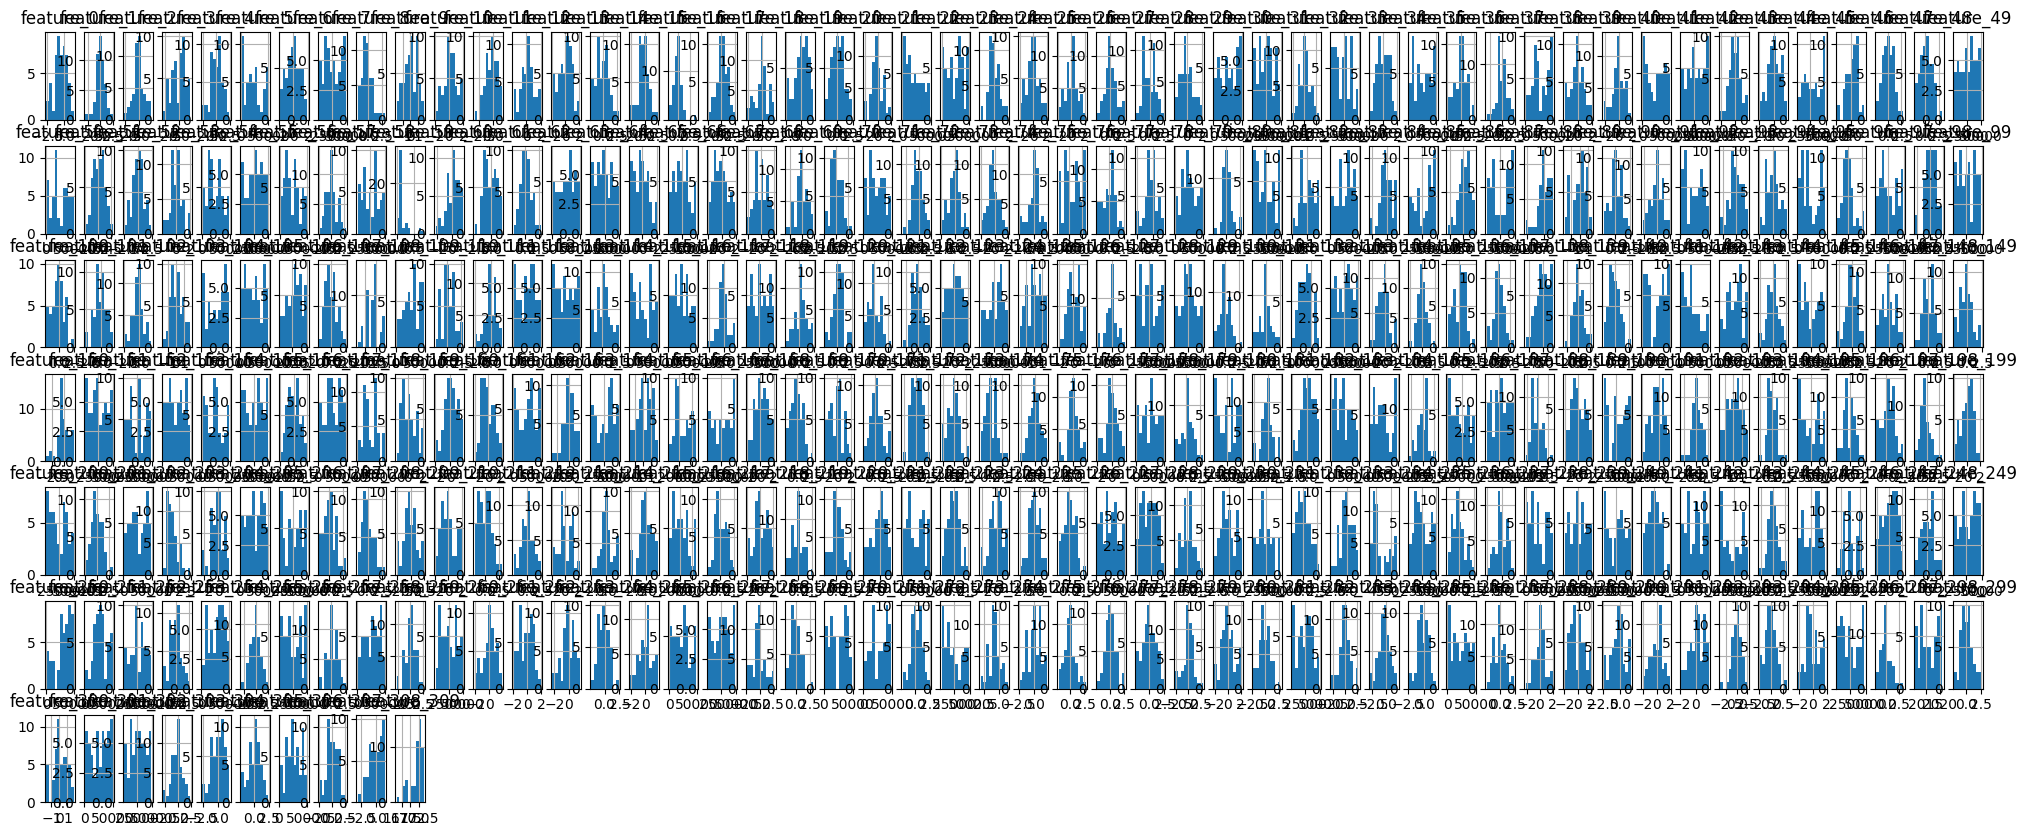

In [54]:
df.sample(50).hist(figsize=(25, 10), layout=(-1, 50));

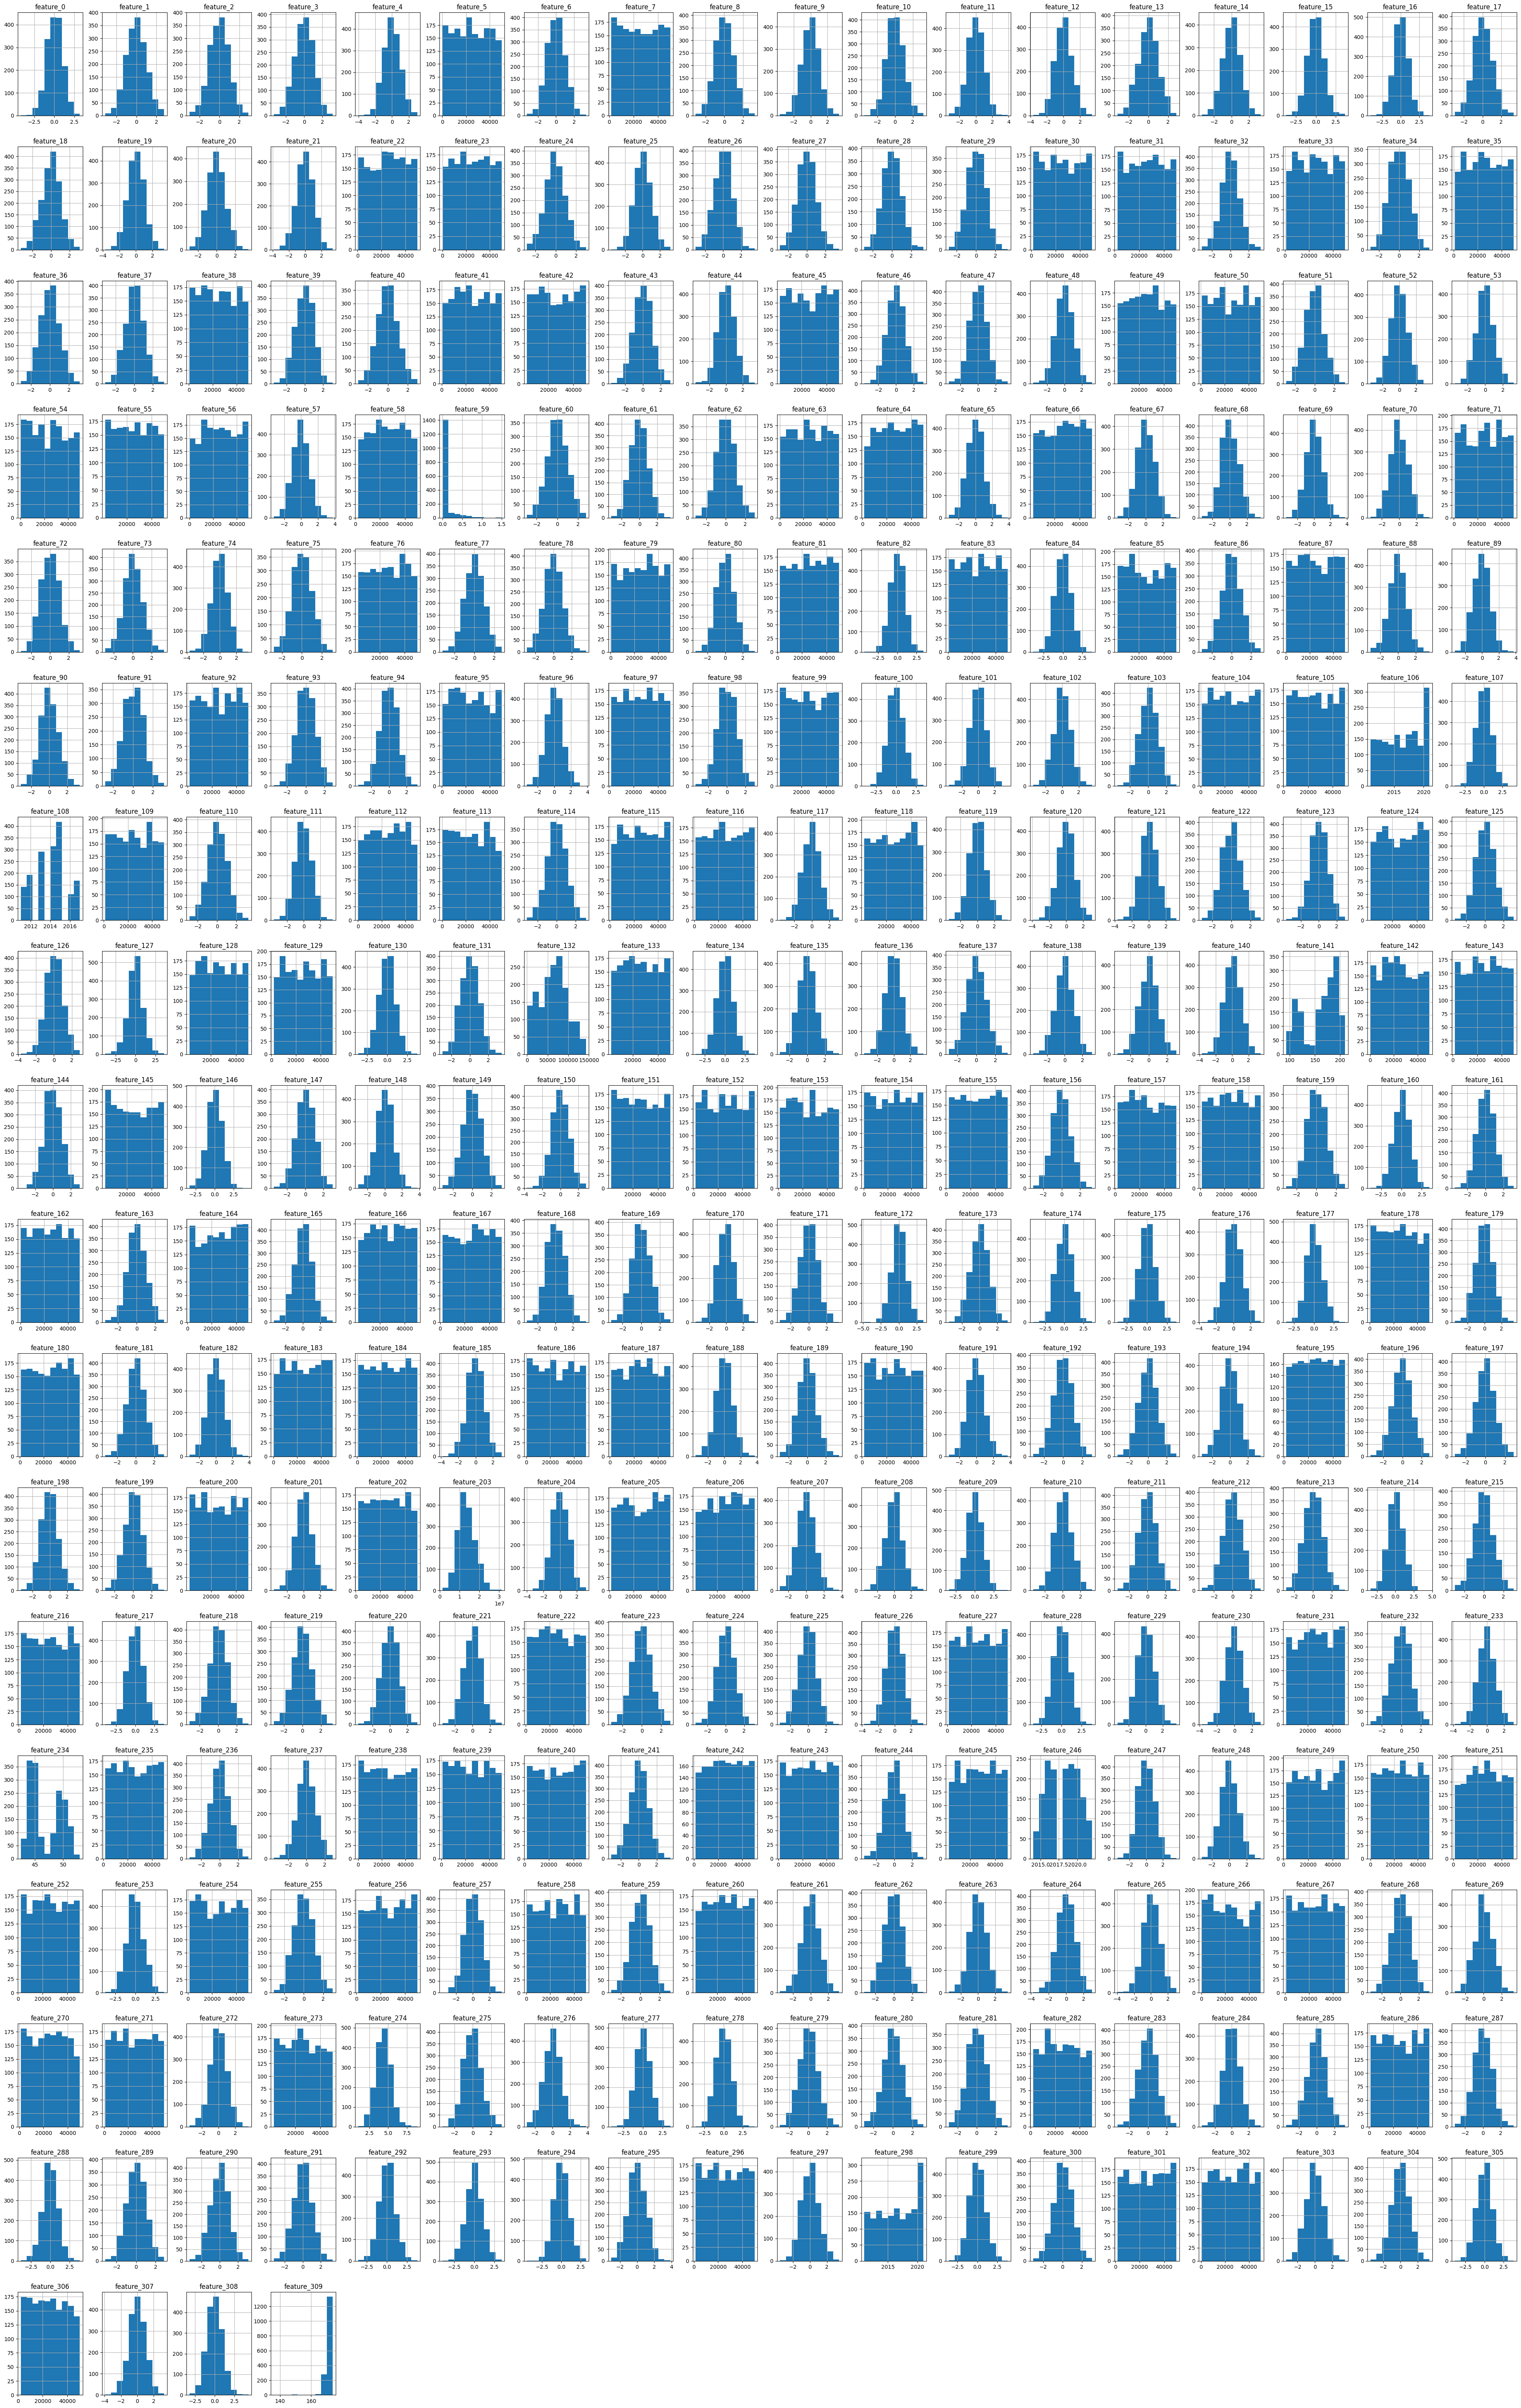

In [59]:
fig = plt.figure(figsize = (50,80), )
ax = fig.gca()
df.hist(ax = ax);

In [ ]:
feature_59
feature_141
feature_203
feature_234
feature_309
feature_127
feature_106
feature_108
feature_246
feature_132
feature_298

feature_141
feature_234
feature_59
feature_309
feature_203
feature_127
feature_274
feature_246
feature_132
feature_108

In [7]:
df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_301,feature_302,feature_303,feature_304,feature_305,feature_306,feature_307,feature_308,feature_309,target
0,-0.917,-0.313,-0.69,0.771,0.086,44800,1.38,42902,-0.40,0.51,...,49118,43122,-0.99,-0.68,-0.07,8006,-0.166,0.40,173,gear_stick
1,1.406,0.324,0.88,0.104,1.275,2097,-0.53,19640,0.25,1.12,...,23477,26027,0.20,0.24,-0.13,9512,0.816,1.28,173,wheel_shake
2,0.908,0.652,0.62,0.482,0.768,21520,0.88,7491,1.07,0.58,...,19738,5099,1.53,0.18,0.69,35420,0.994,0.16,170,break_bug
3,-0.527,-0.892,-0.12,-0.764,-0.811,7649,0.61,12421,-1.78,0.21,...,27290,17042,-1.84,-0.76,-0.10,36626,0.867,-2.71,170,another_bug
4,0.050,0.646,-2.51,0.510,-0.755,27745,0.00,38967,1.08,1.46,...,43419,6234,-0.97,-0.62,0.91,35750,0.076,-0.07,173,electro_bug
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1631,-0.960,-0.699,-0.04,0.238,-1.751,13201,0.91,39896,0.33,-1.05,...,37689,13329,-0.57,0.19,-0.54,16087,-0.487,-0.35,172,gear_stick
1632,0.088,-0.612,1.30,0.716,-0.039,46709,-0.35,17423,0.78,-1.61,...,18623,28892,0.65,-0.60,-0.96,38816,-1.602,-2.95,171,gear_stick
1633,-0.577,-1.050,-1.05,0.160,1.644,26344,-0.17,47545,0.35,0.51,...,23284,22642,-1.22,-1.03,0.82,27475,-0.302,1.88,170,another_bug
1634,1.074,-1.027,-0.53,-0.519,-1.341,42592,0.16,27582,0.15,0.65,...,23016,42662,-1.15,0.24,0.84,19920,0.323,-0.05,174,electro_bug
